# **Forecasting AAPL Stock Prices Using Linear Regression**

> *by Christiano Jose Intoro (24/546891/PA23217) & Farrel Tsaqif Anindyo (24/536735/PA/22769)*



In this project, we want to apply Linear Regression, a basic yet powerful statistical method, to predict the future closing prices of **Apple Inc. (AAPL)** stock. We use real-world stock market data fetched from *Yahoo Finance via the Python library yfinance*, which makes it easy to access historical financial data directly into our code.

We chose AAPL because it is one of the most well-known and widely traded companies in the world, making its stock a meaningful and interesting case study. Our goal is to **understand and visualize how AAPL’s stock price has changed over time and use a simple mathematical model to forecast where it might go next**.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# Download 4 year of daily data
data = yf.download('AAPL', start='2021-01-01', end='2025-05-24')

data.reset_index(inplace=True)

df = data[['Date', 'Close']]

# Show first few rows
df

[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,AAPL
0,2021-01-04,126.239693
1,2021-01-05,127.800476
2,2021-01-06,123.498535
3,2021-01-07,127.712700
4,2021-01-08,128.815018
...,...,...
1098,2025-05-19,208.779999
1099,2025-05-20,206.860001
1100,2025-05-21,202.089996


In [ ]:
# Flatten MultiIndex columns by joining with an underscore
df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

In [ ]:
# Create time index
df['Day'] = np.arange(len(df))

<ipython-input-88-c7dc0449549c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day'] = np.arange(len(df))


In [ ]:
print(df.head())

       Date_  Close_AAPL  Day
0 2021-01-04  126.239693    0
1 2021-01-05  127.800476    1
2 2021-01-06  123.498535    2
3 2021-01-07  127.712700    3
4 2021-01-08  128.815018    4


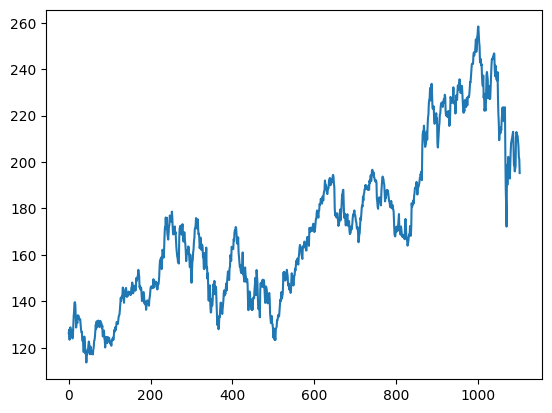

In [ ]:
plt.plot(df['Close_AAPL'], label='Actual')

In [ ]:
x = df['Day'].values
y = df['Close_AAPL'].values
n = len(x)

# Data split
split_index = int(n * 0.8)
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

# Calculate sums
sum_x = np.sum(x_train)
sum_y = np.sum(y_train)
sum_xy = np.sum(x_train * y_train)
sum_x2 = np.sum(x_train ** 2)
n_train = len(x_train)



---
In this part we want to assign several variables, there are :
- **x** : number of days since the beginning (time)
- **y** : closing price of AAPL stock
- **n** : number of observations (total trading days)

Where, those variables will be needed to count the sums for slope/intercepts such as :
- **sum_x** : total of all day numbers
- **sum_y** : total of all prices
- **sum_xy** : total of each x*y product (helps find correlation)
- **sum_x2** : total of all x² (used in slope denominator)


In [ ]:
# Calculate slope (b) and intercept (a)
b = (n_train * sum_xy - sum_x * sum_y) / (n_train * sum_x2 - sum_x ** 2)
a = (sum_y - b * sum_x) / n_train



---

After that, we want to predict using **Linear Regression Model**, whre we want to compute the **slope (b)** and **intercept (a)**.

description :
- **b** : slope of the line —> how much price increases per day
- **a** : intercept —> estimated price on day 0



---



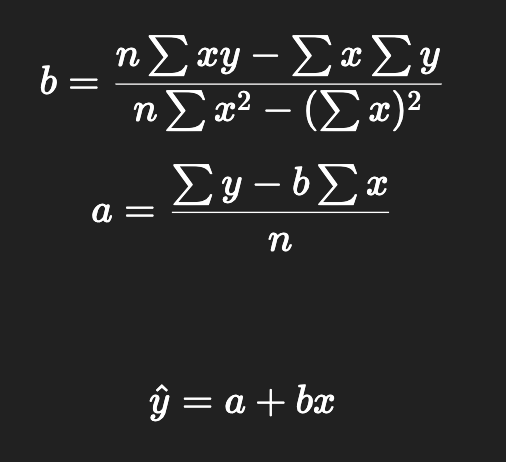

In [ ]:
# Predict values
df['Train_Predicted'] = np.nan
df['Train_Predicted'][:split_index] = a + b * x_train

df['Test_Predicted'] = np.nan
df['Test_Predicted'][split_index:] = a + b * x_test

<ipython-input-93-71b7cbf488af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Train_Predicted'] = np.nan
<ipython-input-93-71b7cbf488af>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single st



---


For every value of x, this computes the predicted price :


---

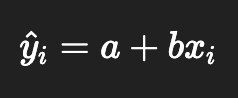



---

-> This represents the regression line over historical data

In [ ]:
# Forecast parameters
forecast_days = 365
last_day = x[-1]
future_days = np.array([last_day + i for i in range(1, forecast_days + 1)])
future_predictions = a + b * future_days



---


- **forecast_days = 365** : forecasting 1 year into the future.
- **last_day = x[-1]** : last known trading day index.
- **future_days** : array of the next 365 days (as integers).
- **future_predictions** : uses the same regression line to forecast

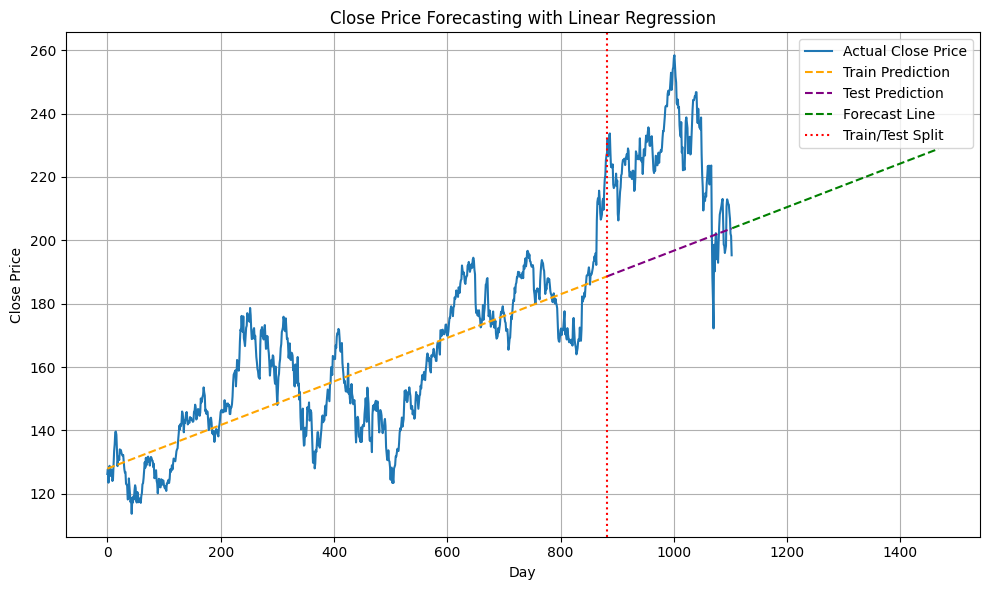

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['Close_AAPL'], label='Actual Close Price')
plt.plot(df['Train_Predicted'], label='Train Prediction', linestyle='--', color='orange')
plt.plot(df['Test_Predicted'], label='Test Prediction', linestyle='--', color='purple')
plt.plot(future_days, future_predictions, label='Forecast Line', linestyle='--', color='green')
plt.axvline(x=split_index, color='red', linestyle=':', label='Train/Test Split')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Close Price Forecasting with Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---


- The linear regression trend line (orange) calculates the average rate of price increase per day on training data and extend the same model onto unseen test data (purple).
- This trend is then extrapolated forward 365 time steps (green dashed line).

In [ ]:
y_pred_test = df['Test_Predicted'].dropna().values

# Calculate Mean Squared Error manually
squared_errors = ((y_test - y_pred_test) ** 2)
mse = np.mean(squared_errors)

# Print the result
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1104.78




---

For the last part, we want to calculate the error for the prediction. We want to use this formula to calculate error and its average (MSE) :

---

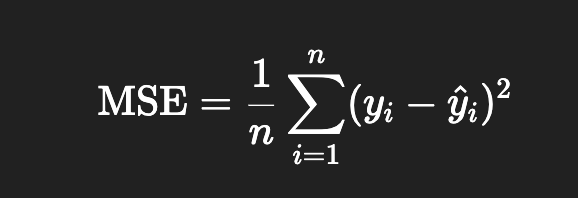



---

By using that formula, we want to see how far off our model is on average. and we get an average squared error of ~1104.78 implies that, on average, we the model’s prediction is off by about :

√1104.78 ≈ **33.23 dollars**

-> which means the model is typically about $33.23 off from the actual price on any given day. Which the error is big for this prediction.


# Conclusion

In this project, we used a **Linear Regression model** to predict the future price of AAPL stock. The model draws a straight line that best fits the past stock prices and uses this line to guess what might happen in the future. Based on this, it predicts that the stock price could reach around \$258 in the next 365 trading days. This kind of model is good for showing the general trend—whether the price is going up or down over time.

However, the model isn’t very accurate when it comes to predicting exact prices. The error, measured using something called Mean Squared Error (MSE), is 1104.78. This means that, on average, the predictions are about \$33 off from the actual prices. That’s a pretty big difference, and it happens because stock prices don’t move in a perfect straight line—they go up and down a lot. To get better results, we could use more advanced models, like **polynomial regression** with higher degree (2 or 3). These can handle more complicated patterns, such as u shapes or wavy trends.